<a href="https://colab.research.google.com/github/bodamohannaik/DLAI-TF-DPC/blob/master/C2/W2/humans_vs_horses_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

# Download Dataset

In [ ]:
!curl -O https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
!mkdir -p ./data/train
!unzip -q horse-or-human.zip -d data/train
!ls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  142M  100  142M    0     0   147M      0 --:--:-- --:--:-- --:--:--  147M
data  horse-or-human.zip  sample_data


In [ ]:
!curl -O https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
!mkdir -p ./data/validation
!unzip -q validation-horse-or-human.zip -d ./data/validation
!ls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.9M  100 10.9M    0     0  35.0M      0 --:--:-- --:--:-- --:--:-- 34.9M
data  horse-or-human.zip  sample_data  validation-horse-or-human.zip


# Load the Data

In [ ]:
def get_train_gen():
  train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=45, height_shift_range=.2, width_shift_range=.2, shear_range=.2,
                                                                   zoom_range=.2, horizontal_flip=True, vertical_flip=True)
  train_gen = train_data_gen.flow_from_directory(directory='./data/train', target_size=(300,300), color_mode='rgb', class_mode='binary', batch_size=32)
  return train_gen
get_train_gen()

Found 1027 images belonging to 2 classes.


In [ ]:
def get_val_gen():
  val_data_gen = tf.keras.preprocessing.image.ImageDataGenerator()
  val_gen = val_data_gen.flow_from_directory(directory='./data/validation', target_size=(300,300),
                                              color_mode='rgb', class_mode='binary', batch_size=32)
  return val_gen
get_val_gen()

Found 256 images belonging to 2 classes.


# Visualize the images

In [ ]:
train_gen = get_train_gen()

Found 1027 images belonging to 2 classes.


In [ ]:
train_gen.filenames[:10]

['horses/horse01-0.png',
 'horses/horse01-1.png',
 'horses/horse01-2.png',
 'horses/horse01-3.png',
 'horses/horse01-4.png',
 'horses/horse01-5.png',
 'horses/horse01-6.png',
 'horses/horse01-7.png',
 'horses/horse01-8.png',
 'horses/horse01-9.png']

In [ ]:
indices_class = {v:k for k,v in train_gen.class_indices.items()}
indices_class

{0: 'horses', 1: 'humans'}

In [ ]:
images = next(train_gen)

In [ ]:
images[0].shape, images[1].shape

((32, 300, 300, 3), (32,))

In [ ]:
images[0][0]

array([[[169.4803 , 198.4619 , 248.75705],
        [164.15866, 194.4555 , 247.20084],
        [166.37222, 195.3278 , 247.95752],
        ...,
        [131.     , 171.     , 232.     ],
        [131.     , 171.     , 232.     ],
        [131.     , 171.     , 232.     ]],

       [[157.68698, 192.67108, 246.51842],
        [152.22173, 188.74986, 245.8417 ],
        [152.66663, 187.92863, 245.01315],
        ...,
        [131.     , 171.     , 232.     ],
        [131.     , 171.     , 232.     ],
        [131.     , 171.     , 232.     ]],

       [[148.5621 , 187.18002, 244.9662 ],
        [145.69542, 185.16554, 244.56842],
        [144.61086, 184.6572 , 243.97414],
        ...,
        [131.     , 171.     , 232.     ],
        [131.     , 171.     , 232.     ],
        [131.     , 171.     , 232.     ]],

       ...,

       [[200.9295 , 177.9295 , 157.9295 ],
        [201.97464, 178.97464, 158.     ],
        [203.98024, 180.98024, 159.     ],
        ...,
        [235.     , 204.  

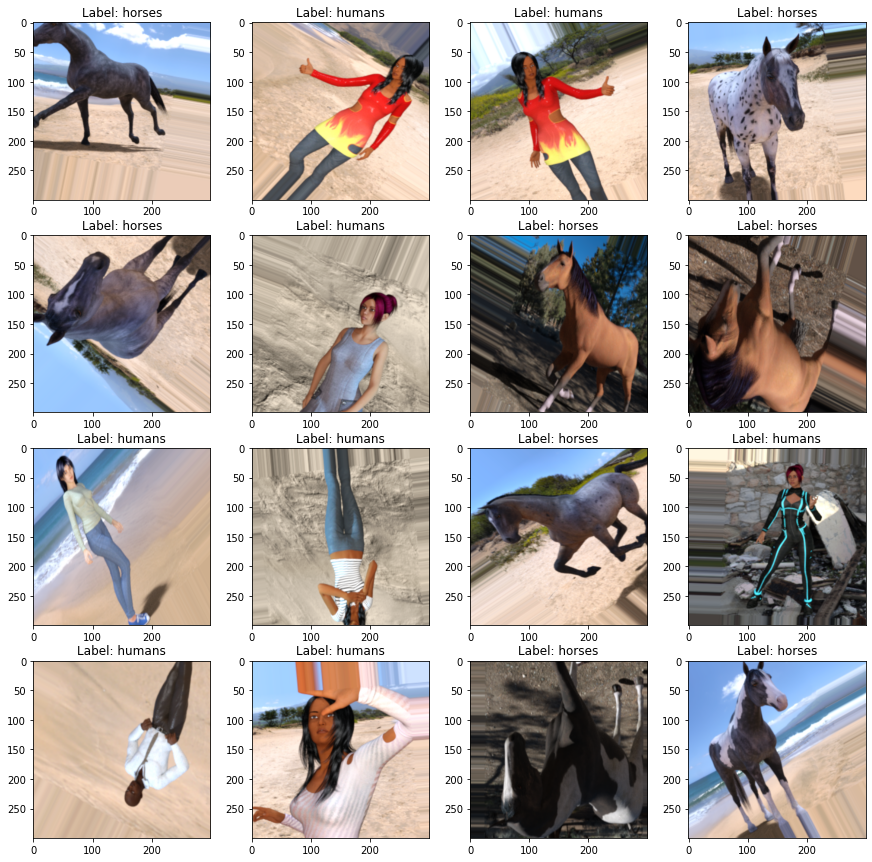

In [ ]:
fig, axs = plt.subplots(4,4, figsize=(15,15))
for i in range(16):
  ax = axs[int(i/4), i%4]
  cur_image = np.array(images[0][i], dtype=np.uint8)
  ax.imshow(cur_image)
  ax.set_title(f'Label: {indices_class[images[1][i]]}')

In [ ]:
train_gen = get_train_gen()
val_gen = get_val_gen()

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


# Neural Network

In [ ]:
model = tf.keras.Sequential(
    layers = [
              tf.keras.layers.Input(shape = images[0][0].shape),
              tf.keras.layers.Rescaling(scale = 1/255),
              # Conv layer
              tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
              tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
              # Conv layer
              tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
              tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
              # Conv layer
              tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
              tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
              # Conv layer
              tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
              tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
              # Conv layer
              tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
              tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
              # flatten
              tf.keras.layers.Flatten(),
              # Dense
              tf.keras.layers.Dense(units=512, activation='relu'),
              tf.keras.layers.Dense(units=1, activation='sigmoid')
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        1

# Train

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_gen, epochs=20, validation_data=val_gen)

Epoch 1/20
33/33 [==============================] - 40s 836ms/step - loss: 0.7620 - accuracy: 0.5180 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/20
33/33 [==============================] - 28s 850ms/step - loss: 0.6685 - accuracy: 0.6203 - val_loss: 0.8336 - val_accuracy: 0.5938
Epoch 3/20
33/33 [==============================] - 30s 923ms/step - loss: 0.6128 - accuracy: 0.6767 - val_loss: 0.6119 - val_accuracy: 0.7656
Epoch 4/20
33/33 [==============================] - 28s 837ms/step - loss: 0.5339 - accuracy: 0.7371 - val_loss: 1.1505 - val_accuracy: 0.7109
Epoch 5/20
33/33 [==============================] - 28s 844ms/step - loss: 0.5279 - accuracy: 0.7809 - val_loss: 1.0112 - val_accuracy: 0.7656
Epoch 6/20
33/33 [==============================] - 28s 833ms/step - loss: 0.3671 - accuracy: 0.8559 - val_loss: 1.5263 - val_accuracy: 0.7305
Epoch 7/20
33/33 [==============================] - 28s 837ms/step - loss: 0.3533 - accuracy: 0.8500 - val_loss: 0.5100 - val_accuracy: 0.8633

# Plot Accuracy and Loss

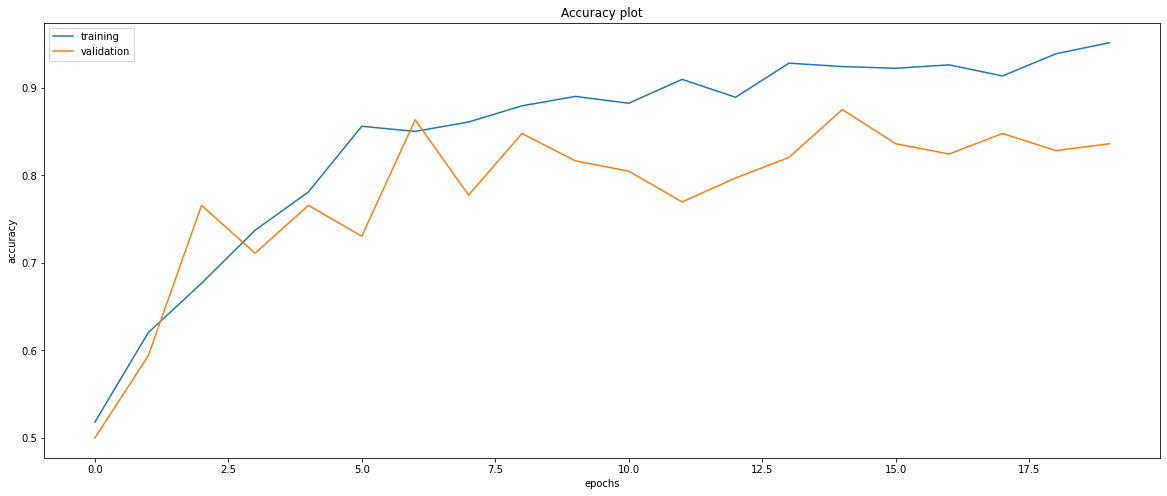

In [ ]:
# Accuracy
fig, axs = plt.subplots(figsize=(20,8))
axs.plot(history.history['accuracy'], label='training')
axs.plot(history.history['val_accuracy'], label='validation')
axs.set_xlabel('epochs')
axs.set_ylabel('accuracy')
axs.set_title('Accuracy plot')
axs.legend()

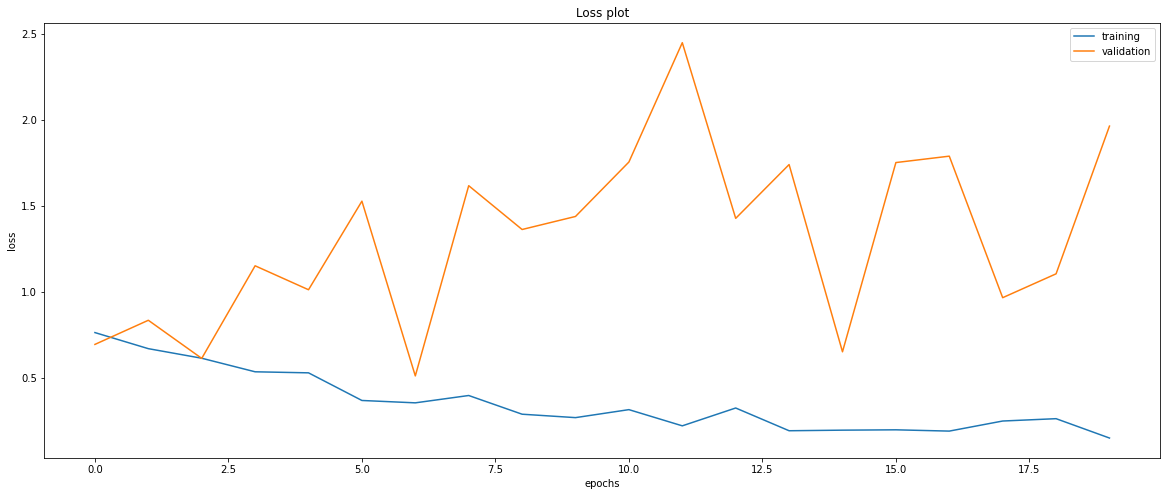

In [ ]:
# Loss
fig, axs = plt.subplots(figsize=(20,8))
axs.plot(history.history['loss'], label='training')
axs.plot(history.history['val_loss'], label='validation')
axs.set_xlabel('epochs')
axs.set_ylabel('loss')
axs.set_title('Loss plot')
axs.legend()

# Predict for new image

In [ ]:
# from google.colab import files
# uploaded_files = files.upload()
# for file in uploaded_files:
#   i = tf.keras.preprocessing.image.load_img(file, color_mode='rgb', target_size = (300,300))
#   x = tf.keras.preprocessing.image.img_to_array(i)
#   x  = np.expand_dims(x, axis=0)
#   y = model.predict(x)
#   label = 0
#   if y[0]>0.5:
#     label =1
#   print(f"file {file} : {indices_class[label]}")

  


# Visualize Intermediate Layer Outputs

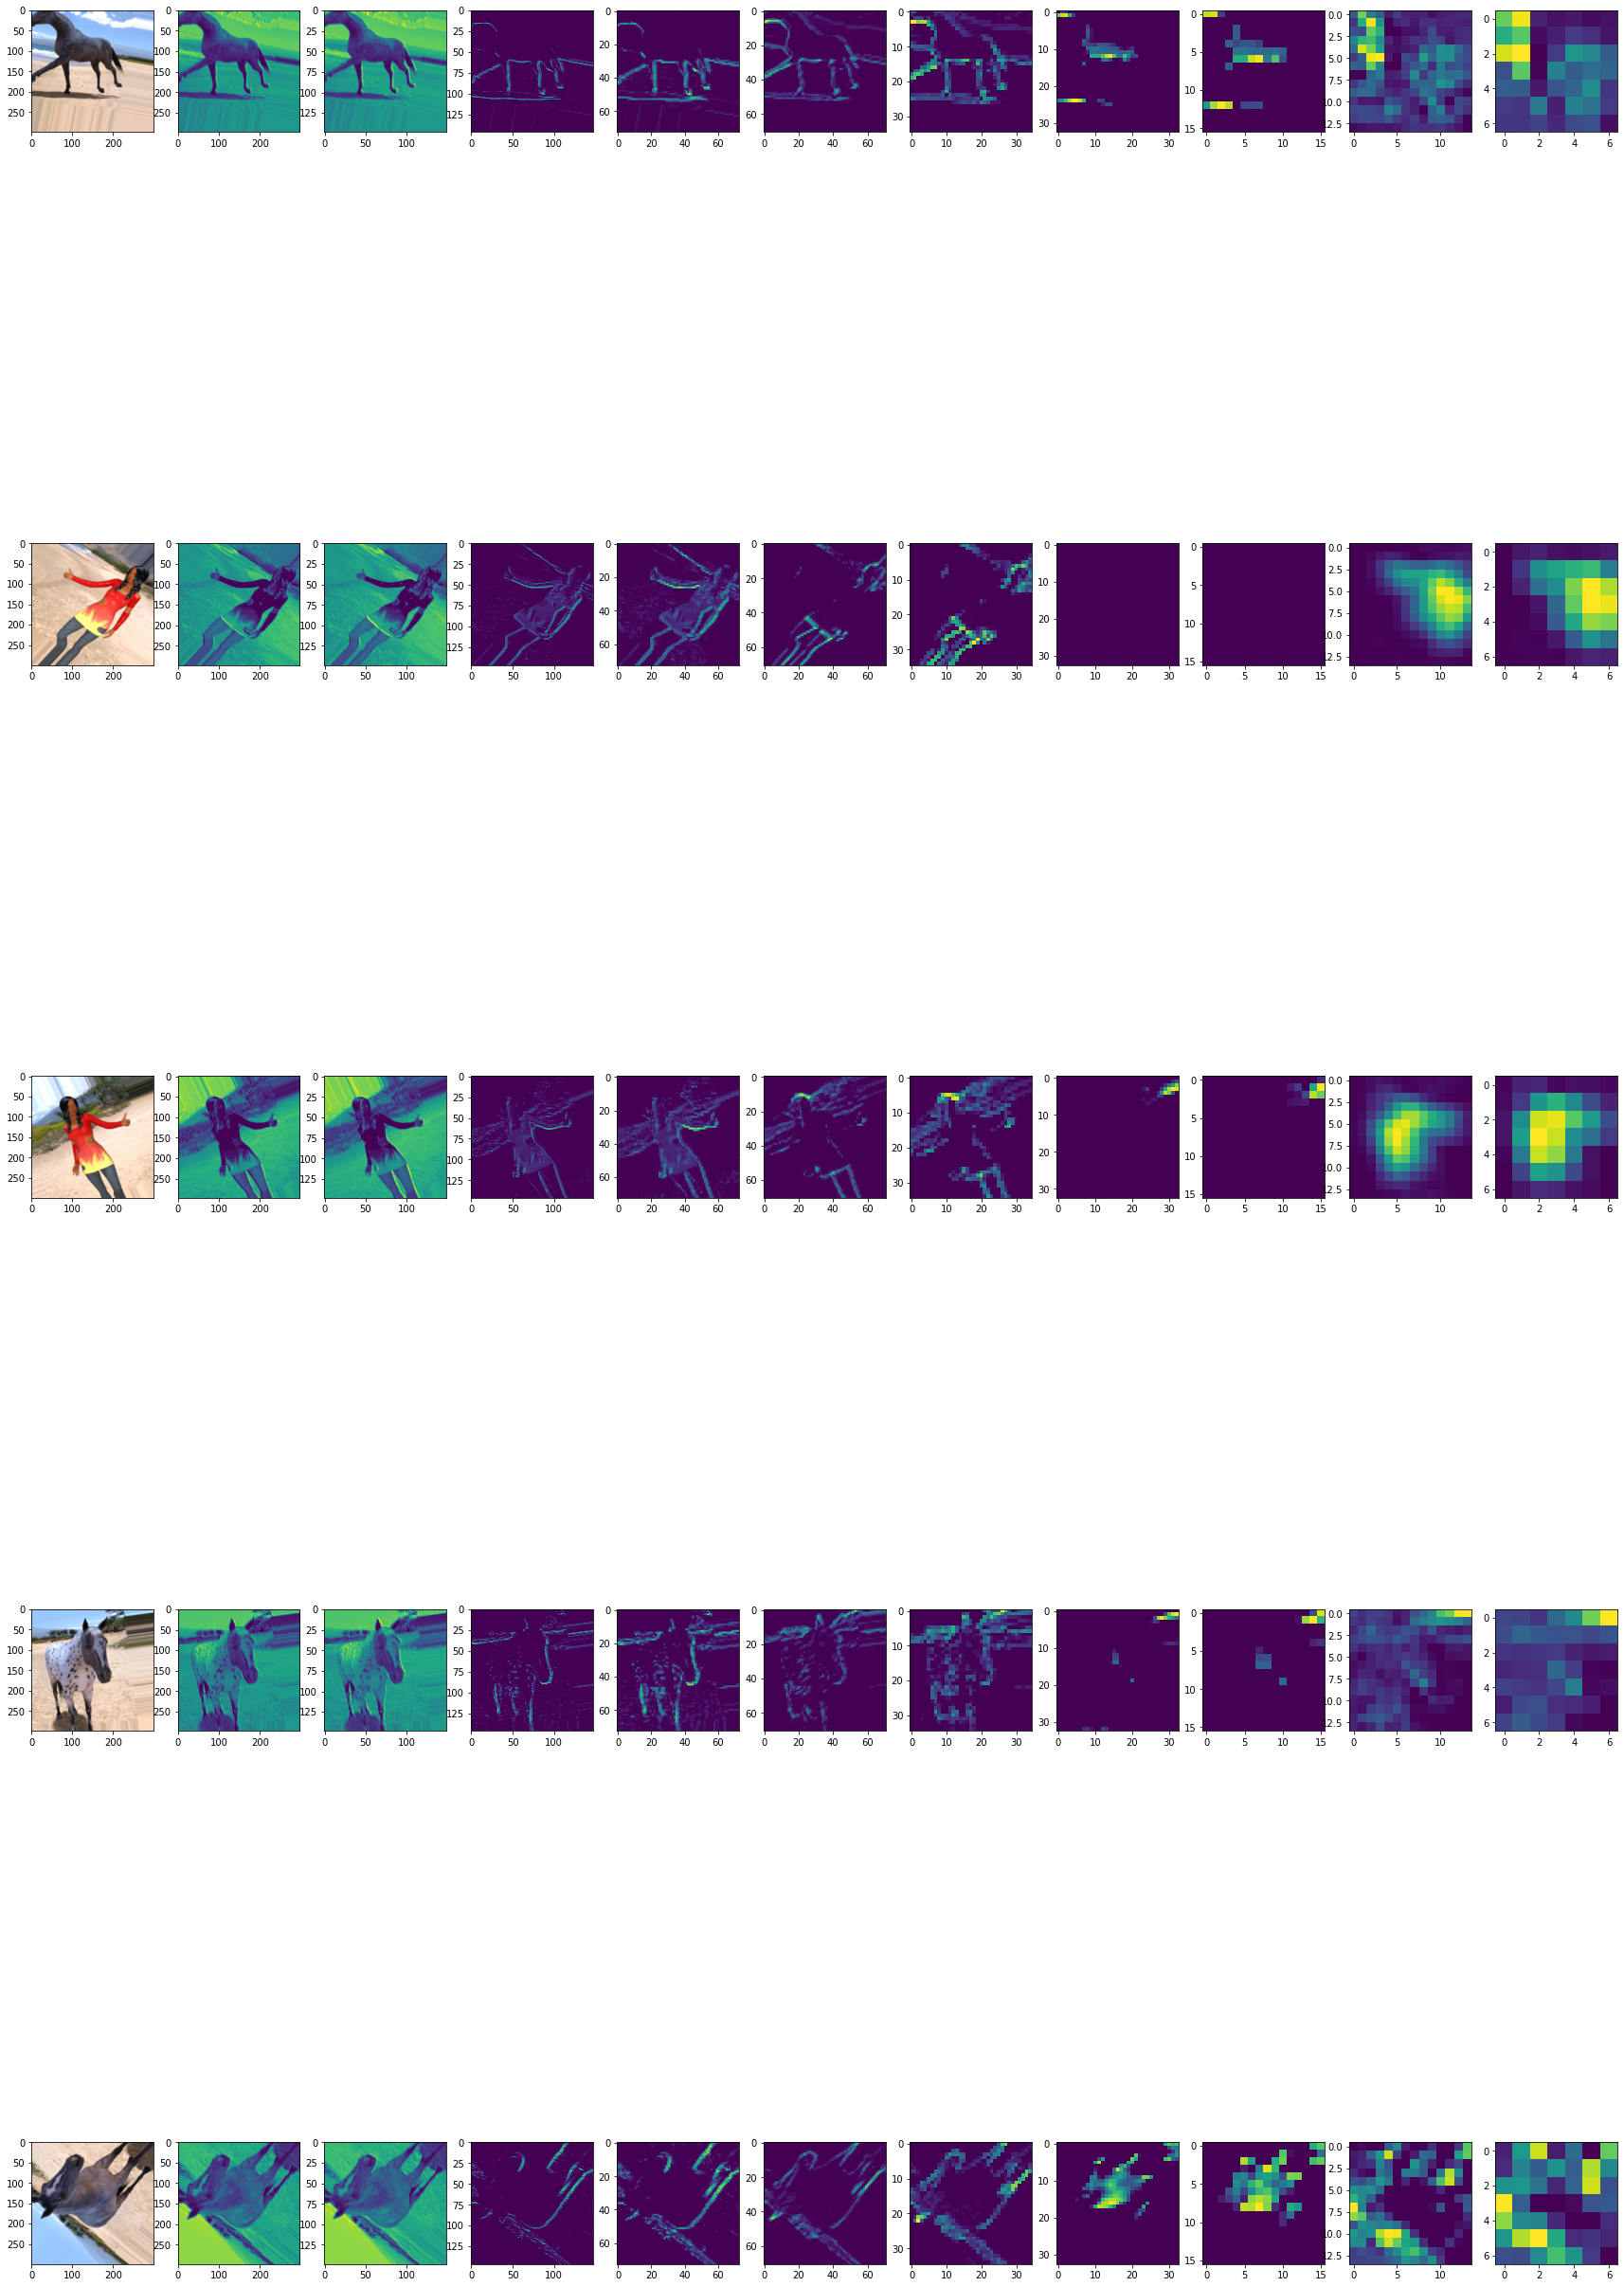

In [ ]:
inputs = model.input
layer_outputs = [layer.output for layer in model.layers]
int_model = tf.keras.Model(inputs=inputs, outputs = layer_outputs)
num_of_images = 5
layer_inds = list(range(0,11))
layer_inds_len = len(layer_inds)
fig, axs = plt.subplots(nrows = num_of_images, ncols = layer_inds_len, figsize=(30,50))
for img_ind in range(num_of_images):
  for l_ind in range(layer_inds_len):
    layer_ind = layer_inds[l_ind]
    ax = axs[img_ind, l_ind]
    out_image = int_model(images[0][[img_ind]])[layer_ind]
    if layer_ind == 0:
      ax.imshow(out_image[0,:,:,:])
    else:
      ax.imshow(out_image[0,:,:,0])
